In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

In [45]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.1.1
Uninstalling scikit-learn-1.1.1:
  Successfully uninstalled scikit-learn-1.1.1


In [47]:
!pip install scikit-learn 

In [3]:
df = pd.read_csv('data_lake/business/features/precios-diarios.csv')
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df = df.set_index('fecha')
df = df.asfreq('D')
df = df.sort_index()
df.head()

,precio,weekday,weekday_bol
fecha,,,
1995-07-20,1.409435,3,0
1995-07-21,4.924333,4,0
1995-07-22,1.269500,5,1
1995-07-23,0.953083,6,1
1995-07-24,4.305917,0,0


In [4]:
def test_train_datasets(data,perc):
    n = round(len(data)*perc)
    data_train = data[:-n]
    data_test  = data[-n:]
    return data_train, data_test

In [5]:
data_train, data_test = test_train_datasets(df,0.25)

In [ ]:
!pip install skforecast
!pip install -U scikit-learn

In [6]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster.fit(y=data_train['precio'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1995-07-20 00:00:00'), Timestamp('2014-11-19 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-27 12:01:58 
Last fit date: 2022-06-27 12:02:00 
Skforecast version: 0.4.3 

In [8]:
steps = len(data_test)
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2014-11-20    167.042051
2014-11-21    162.202093
2014-11-22    159.729370
2014-11-23    158.696926
2014-11-24    157.122226
Freq: D, Name: pred, dtype: float64

In [9]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

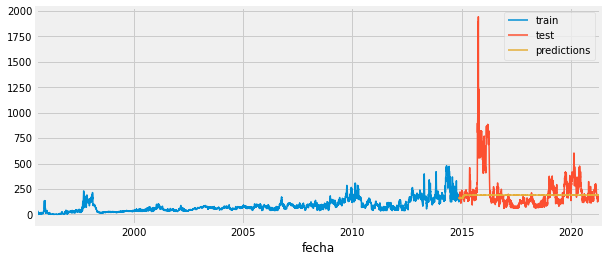

In [10]:
fig, ax = plt.subplots(figsize=(9, 4))
data_train['precio'].plot(ax=ax, label='train')
data_test['precio'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [11]:
def save_best_estimator(estimator):

    import os
    import pickle

    if not os.path.exists("src"):
        os.makedirs("src")
    with open("src/estimator.pickle", "wb") as file:
        pickle.dump(estimator, file)

In [12]:
save_best_estimator(forecaster)